In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [5]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [6]:
classifier = tree.DecisionTreeClassifier(criterion = 'entropy')

### Предобработка данных

In [7]:
X = data[['X_1','X_2']]  
y = data.Y #целевая переменная

Обычно данные которые мы используем - массив. Целевая переменная - пандосовская серия

### Обучение модели

In [8]:
classifier.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

# Дерево решений на примере титаника

In [9]:
titanic_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [10]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
# Проверка пропущеных значений
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Отбираем нужные нам признаки для обработки
X = titanic_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'],
                   axis = 1)
# Survived удалили, потому то это наша целевая переменная
y = titanic_df.Survived

In [13]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [14]:
# clf.fit(X,y) - сделать не получится, потому что не не обрабатывает 
# строковые переменные
# Поэтому в предобработке данных нам нужно избавится он строковых данных

In [15]:
X = pd.get_dummies(X)

In [16]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,19.0,0,0,30.0000,True,False,False,False,True
888,3,NaN,1,2,23.4500,True,False,False,False,True
889,1,26.0,0,0,30.0000,False,True,True,False,False


In [17]:
# а также дерево решений не умеет работать с Nan

In [18]:
X = X.fillna(X.Age.median())

In [19]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [20]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

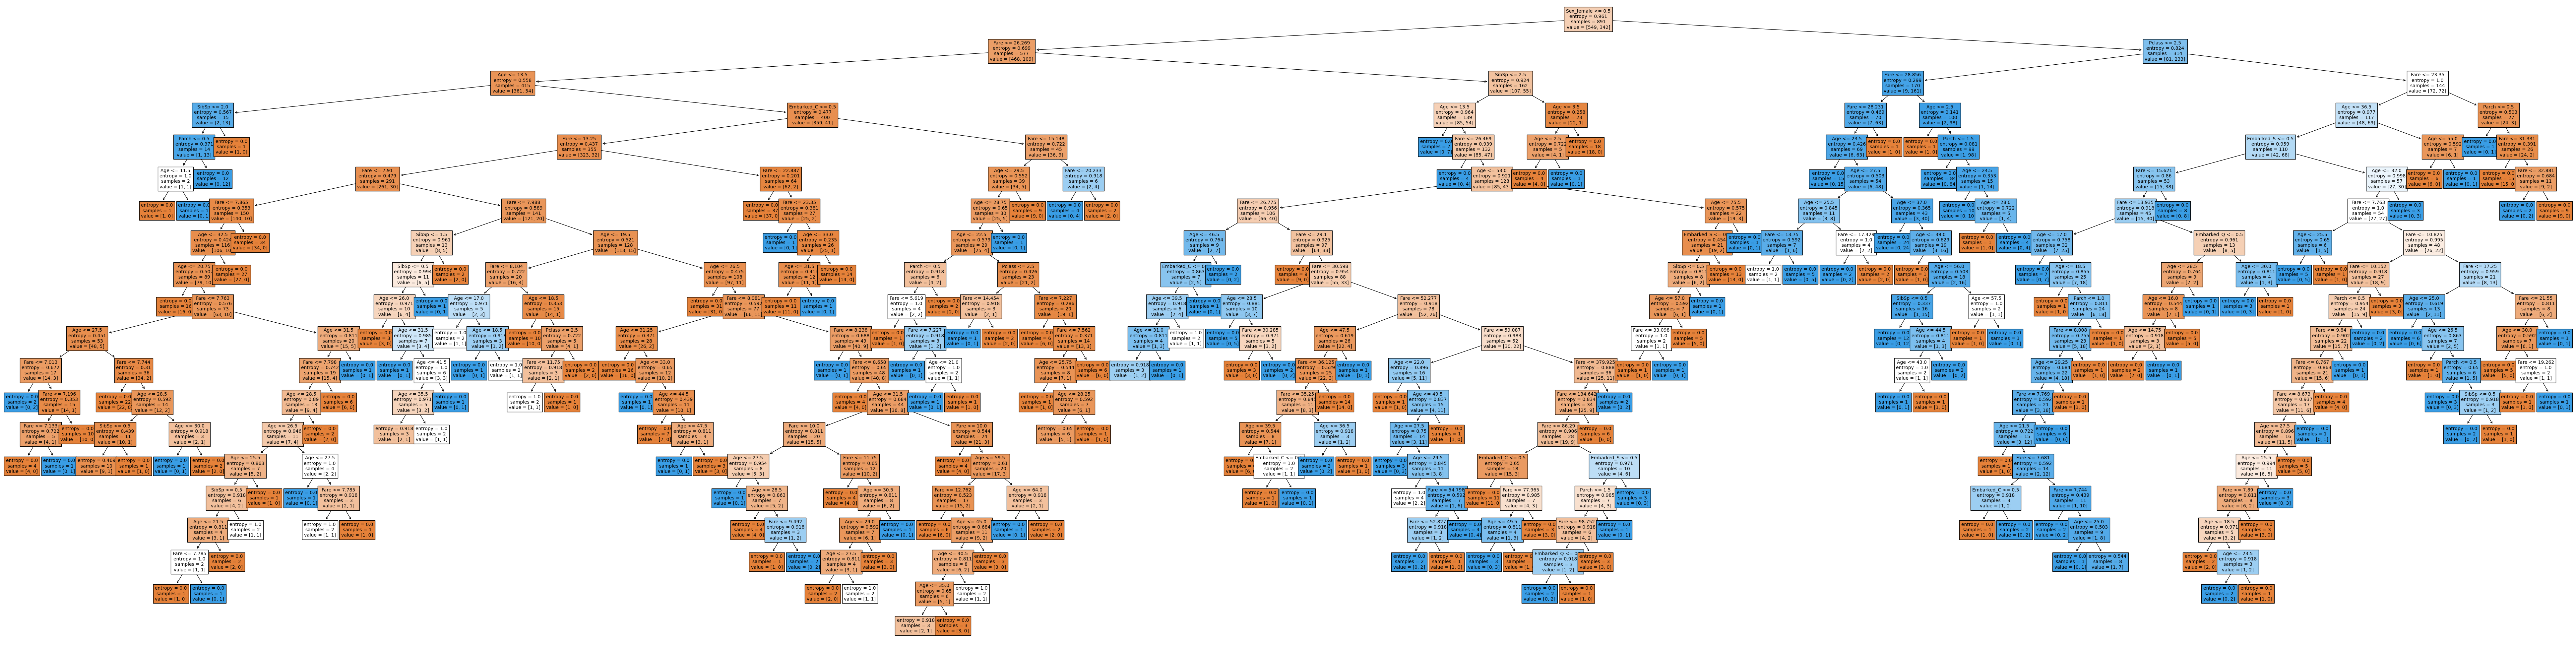

In [21]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.show()

In [22]:
# Модель настолько большая, потому что мы переобучили её

# Это происходит потому, что мы не разделили данные на тестовую и тренировочную
# выборки. А также не ограничили глубину дерева

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
# тут тестовое множество составит 33% (test_size=0.33), а остальные в тренировочное


In [25]:
y_train.shape

(596,)

In [26]:
X_test.shape

(295, 10)

In [27]:
clf.score(X,y) 
# показывает, сколько правильных ответов мы предсказали
# в 97% случаях мы правильно предсказали нашу целевую перемнную

0.9797979797979798

In [28]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
clf.score(X_train,y_train) 

0.9798657718120806

In [30]:
clf.score(X_test,y_test) 
# видим, что с тестовой выборкой классификатор спраляется намного хуже
# можем сделать вывод, что модель преобучена

0.7796610169491526

In [31]:
# ограничим глубину дерева
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [32]:
clf.score(X_train, y_train)

0.8338926174496645

In [33]:
clf.score(X_test, y_test)

0.823728813559322

# Кросс-валидация

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cls = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [36]:
# протестим классификатор кросс валидацией
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [37]:
# мы получили 5 занчений - точности вычислений при разбиении X_train, y_train
# на 5 равных частей
# сначала модель обучилась на первых 4-х и предсказала 5-ю, потом на всех, 
# кроме 4-й, и приедсказала 4-ю и так далее.

In [38]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

# Подбор подходящих параметров

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
clf = tree.DecisionTreeClassifier(min)

TypeError: DecisionTreeClassifier.__init__() takes 1 positional argument but 2 were given

In [ ]:
parametrs = {'criterion': ['gini', 'entropy'],
            'max_depth': range(1,30)}

In [ ]:
grid_search_cv_clf = GridSearchCV(clf,parametrs, cv=5)

In [ ]:
grid_search_cv_clf

GridSearchCV позволяет нам взять классификатор, котрый у нас DecisionTreeClassifier, взять парметры, которые мы ходим потюнить, взять настройки кросс валидации, и дальше обучится на нес=которых данных и прогнать обучение на кросс валидации по параметрам, и выбрать параметры, на которых точность будет максимальной

In [ ]:
grid_search_cv_clf.fit(X_train, y_train)

In [ ]:
grid_search_cv_clf.best_params_

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_

In [ ]:
best_clf

In [ ]:
best_clf.score(X_test,y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
y_pred = best_clf.predict(X_test)

In [ ]:
precision_score(y_test, y_pred, average='micro')

In [ ]:
recall_score(y_test, y_pred, average='micro')

In [ ]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [ ]:
y_predicted_prob 
# тут вероятность отнесения к одному и другому классу

In [ ]:
np.where(y_predicted_prob[:,1]> 0.8, 1, 0)
# предсказываем вручную:
# если во втором столбике переменная больше 0.8, тогда класс 1, 
# иначе - 0

# RandomizedSearchCV

Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

# ROC - кривая

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Ещё один метод устранения переобучения

In [47]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [48]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

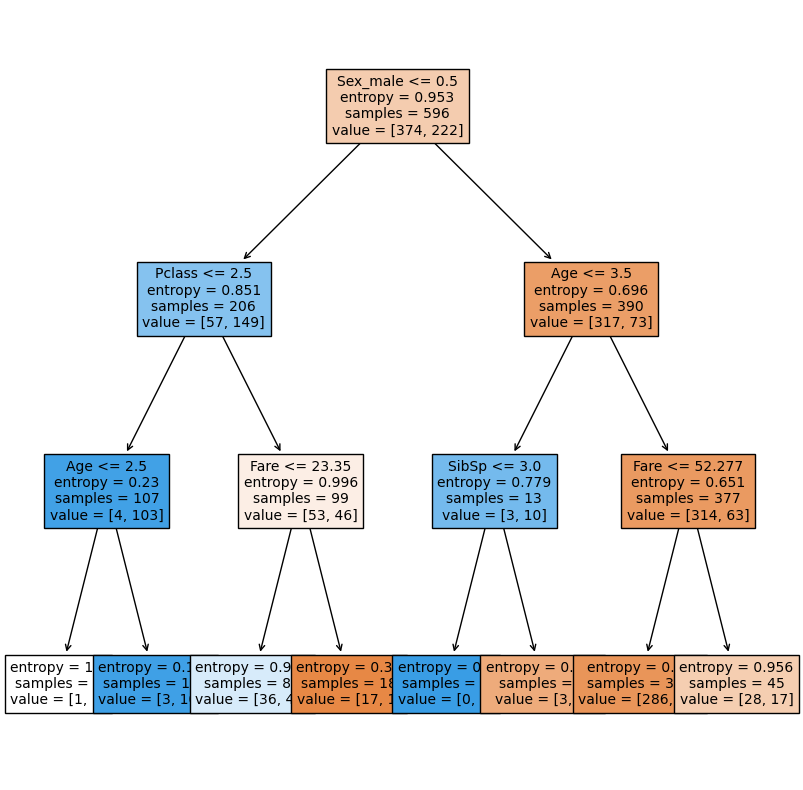

In [49]:
plt.figure(figsize=(10, 10))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.show()

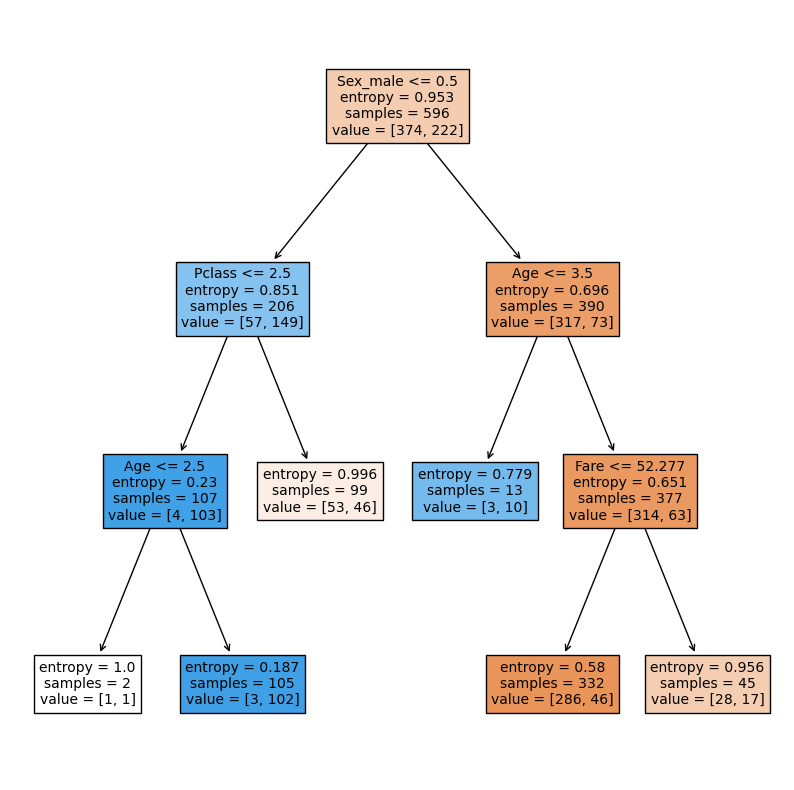

In [51]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3,
                                 min_samples_split = 100)
clf.fit(X_train, y_train)
plt.figure(figsize=(10, 10))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.show()

In [ ]:
# min_samples_split какой размер выборки мы будем считать минимально 
# допустимым для того, чтобы сделать ещё один сплит (спуститься на 1 уровень 
#                                                    вниз)

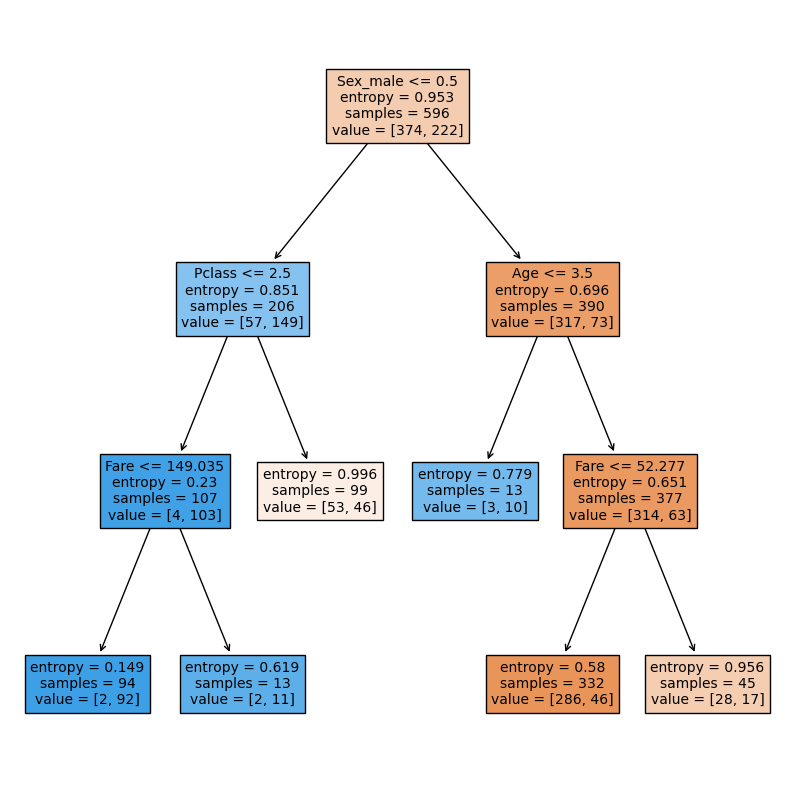

In [52]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3,
                                 min_samples_split = 100,
                                 min_samples_leaf = 10)
clf.fit(X_train, y_train)
plt.figure(figsize=(10, 10))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.show()

In [ ]:
# min_samples_leaf - ни в одном сплите количество семплов не будет меньше
# этого показателя

Таким образом:
- max_depth - Максимальное число уровней дерева (максимальная длина пути от корня до листа)
- min_samples_leaf - Минимальное число образцов в листьях (при получившемся значении ниже разделение не будет произведено)
- min_samples_split - Минимальное число образцов в узле, чтобы его можно было разделить на 2
- min_impurity_decrease - Минимальное снижение "нечистоты" (смешения классов) узла при разделении, чтобы разделение произошло (другими словами: ожидаемое минимальное уменьшение неопределенности (IG))

Проблема дерева решений - самый переобучаемый алгоритм машинного обучения

In [ ]:
# Для решения это проблемы существует случайный лес

# Random Forest

In [54]:
# чем больше деревье - тем лучше

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
clf_rf = RandomForestClassifier()

In [57]:
parametrs = {'n_estimators':[10,20,30],
            'max_depth': [2,5,6,10]}

In [58]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv =5)

In [59]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 6, 10],
                         'n_estimators': [10, 20, 30]})

In [60]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

### Тюнинг модели

В Data Science очень важен подбор параметров и предобработка данных. Для хорошего решения почти любой нетривиальной проблемы нужно понять примерную структуру данных, получить их представление в удобном для использования моделью виде. К первому относится эксплоративный анализ (EDA), а для второго есть feature engineering.

Пример с Decision Tree или Random Forest - допустим, исходные данные выглядят так: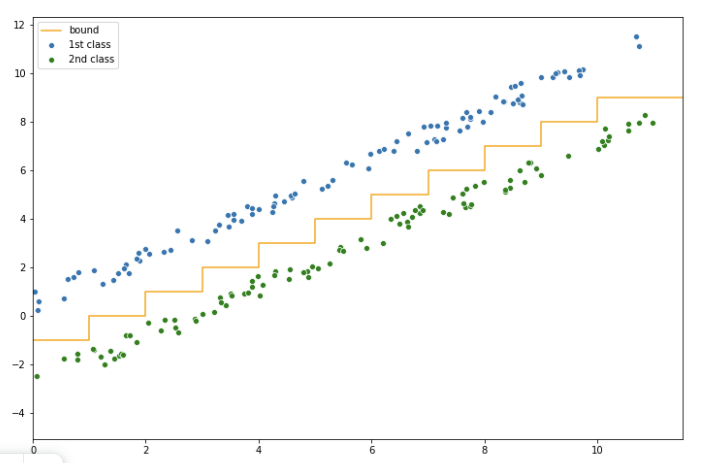
Граница, которую проведёт дерево, будет представлять собою ломанную, и деревьям потребуется большая глубина, чтобы разделить данные.  В то же время, если мы просто повернём наши данные на 45 градусов, то получим такую картину: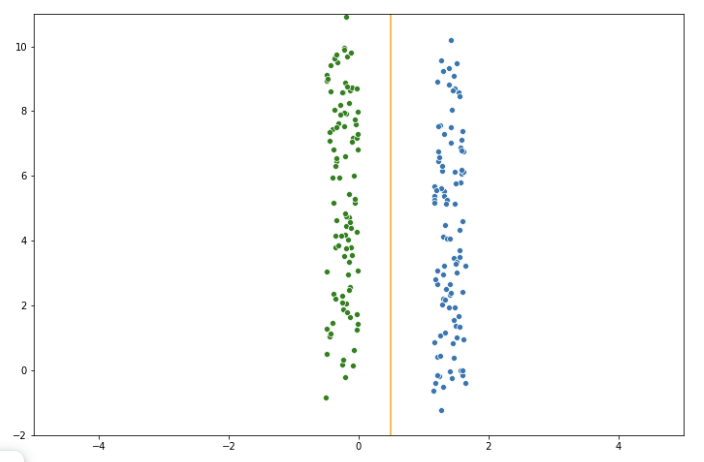

In [70]:
best_clf = grid_search_cv_clf.best_estimator_

In [71]:
best_clf.score(X_test, y_test)

0.8

In [73]:
feature_importances = best_clf.feature_importances_
#Feature_importances_ — атрибут, который возвращает оценки важности для 
# каждого признака в модели случайного леса. Эти оценки указывают на 
# относительную важность каждого признака в предсказании целевой переменной.
# Представим его в более удобном виде

In [78]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                       'feature_importances': feature_importances})

In [80]:
feature_importances_df.sort_values('feature_importances', ascending = False)

,features,feature_importances
5,Sex_female,0.307257
6,Sex_male,0.203313
4,Fare,0.148700
0,Pclass,0.131604
1,Age,0.090914
3,Parch,0.040676
2,SibSp,0.032479
9,Embarked_S,0.018740
7,Embarked_C,0.018412
8,Embarked_Q,0.007905


Предсказания, которые дают модели, это уже хорошо, однако не всегда достаточно. С разными усилиями, мы также можем извлечь важность переменных для осуществления предсказания. Это особенно интересно в науке, где мы пытаемся выявить причинно-следственные связи (хотя, от важности переменных до проверки этих связей ещё длинный путь). Из Decision Tree и Random Forest легко вытащить важность переменных для предсказания, но есть одна особенность. При высокой скореллированности нескольких переменных сплит по любой из них может давать одинаковый Information Gain, и выбор будет сделан случайно. То есть, важность фичей может изменяться в зависимости от выбора из равноценных в процессе обучения. Поэтому следует смотреть на корреляцию между переменными перед обучением, чтобы лучше представлять данные.

In [3]:
df_submission = pd.read_csv('https://stepik.org/media/attachments/course/4852/submission_data_test.csv')
df_submission.head()

,step_id,timestamp,submission_status,user_id
0,31971,1526800961,wrong,24370
1,31971,1526800976,wrong,24370
2,31971,1526800993,wrong,24370
3,31971,1526801054,correct,24370
4,31972,1526800664,wrong,24370


In [4]:
df_events = pd.read_csv('https://stepik.org/media/attachments/course/4852/events_data_test.csv')
df_events.head()

,step_id,timestamp,action,user_id
0,30456,1526893787,viewed,24417
1,30456,1526893797,viewed,24417
2,30456,1526893954,viewed,24417
3,30456,1526895780,viewed,24417
4,30456,1526893787,discovered,24417


In [5]:
# предсказать, наберет ли пользователь более 40 баллов на курсе или нет